# Fashion MNIST Model

### 데이터 로드

In [83]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [84]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Fashion MNIST 데이터 셋에서 사용되는 총 10개의 클래스 이름을 class_names 변수로 저장한다.

In [85]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [86]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

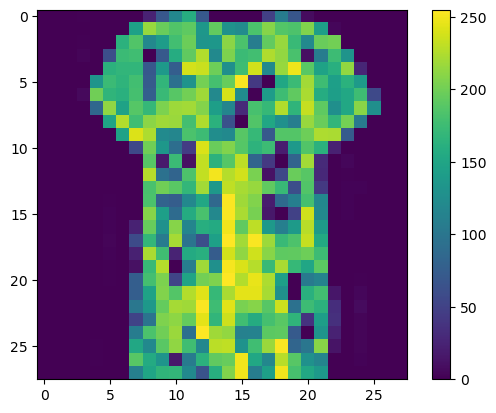

In [87]:
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar() # 값을 이미지로 출력
plt.show()

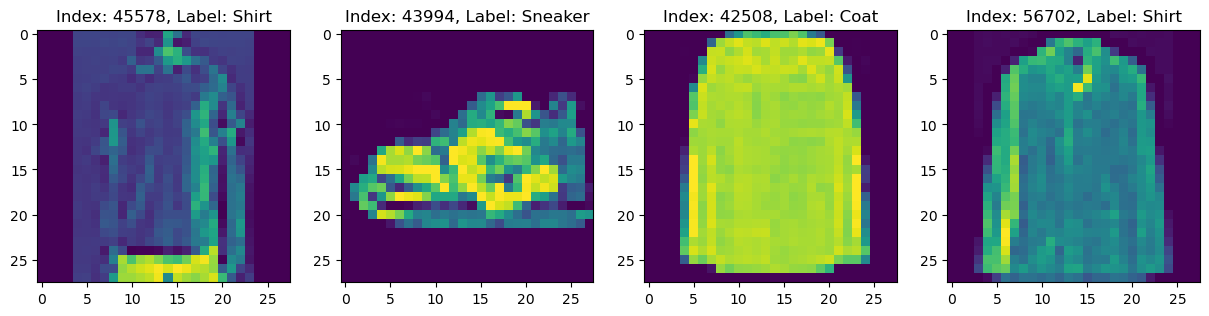

In [88]:
import numpy as np

num_sample = 4 # 4개의 샘플 이지지
random_idxs = np.random.randint(60000, size=num_sample) # 랜덤하게 이미지 가져오기

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

### 데이터 전처리

In [89]:
print(x_train.shape) # 학습 데이터
print(x_val.shape) # 검증 데이터
print(x_test.shape) # 테스트 데이터

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


In [90]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [91]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [92]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [93]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

### 모델 구성

In [14]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### 모델 컴파일 및 학습

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.2429 - loss: 2.2868 - val_accuracy: 0.3756 - val_loss: 2.0237
Epoch 2/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5445 - loss: 1.9555 - val_accuracy: 0.6116 - val_loss: 1.7934
Epoch 3/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6284 - loss: 1.7422 - val_accuracy: 0.6602 - val_loss: 1.6168
Epoch 4/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6680 - loss: 1.5800 - val_accuracy: 0.6364 - val_loss: 1.4767
Epoch 5/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6754 - loss: 1.4413 - val_accuracy: 0.6522 - val_loss: 1.3661
Epoch 6/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6903 - loss: 1.3348 - val_accuracy: 0.6787 - val_loss: 1.2752
Epoch 7/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6951 - loss: 1.2563 - val_accuracy: 0.6993 - val_loss: 1.2022
Epoch 8/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7055 - loss: 1.1882 - val_accuracy: 0.6961 - v

In [17]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

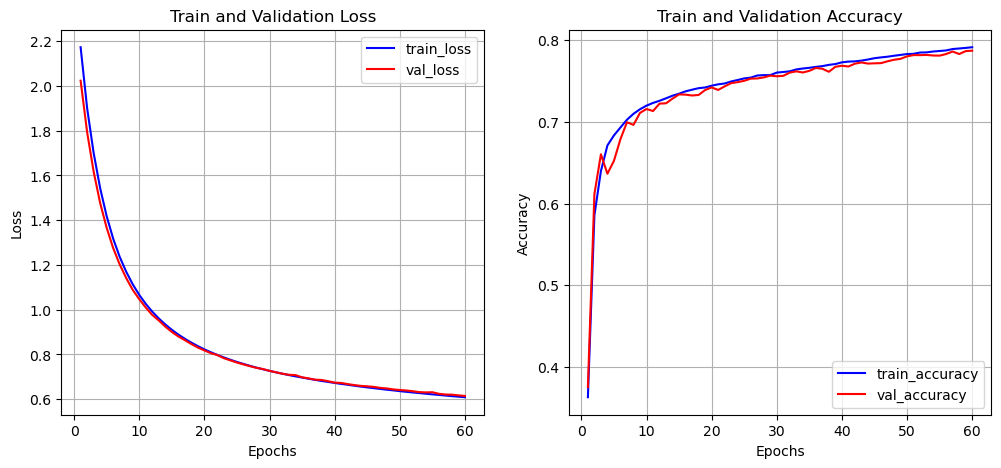

In [18]:
show_history(history)

### 모델 평가 및 예측

In [19]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7869 - loss: 0.6228


[0.6277080774307251, 0.7799000144004822]

In [20]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[1.0038420e-02 9.4881368e-01 3.2790119e-03 1.3101347e-02 2.0270808e-02
 4.6287587e-05 4.3099024e-03 2.2898790e-05 9.9761259e-05 1.7982758e-05]
1
Trouser


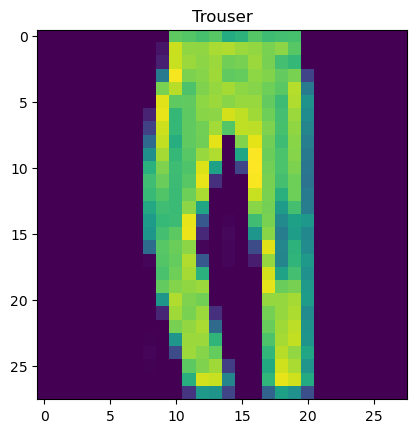

In [21]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [25]:
def plot_image(i, pred_ys, y_test, img): # 이미지와 레이블을 함께 출력하기 위한 함
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    # 동일하면 색으로 blue를 사용하고, 다르면 red 색
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [26]:
def plot_class(i, pred_ys, true_label): # 어떤 클래스에 얼만큼의 확률로 예측했는 지 출력해 주는 함수
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

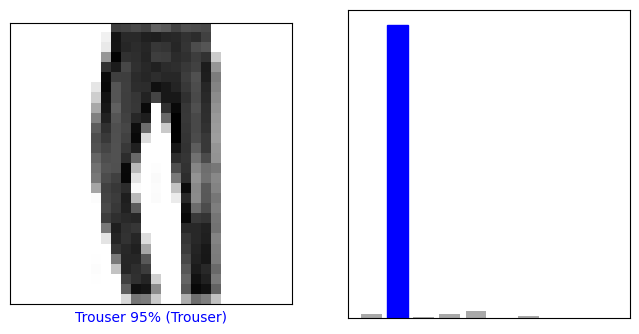

In [27]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

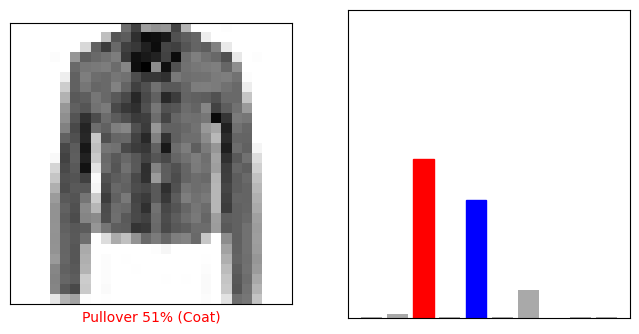

In [28]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

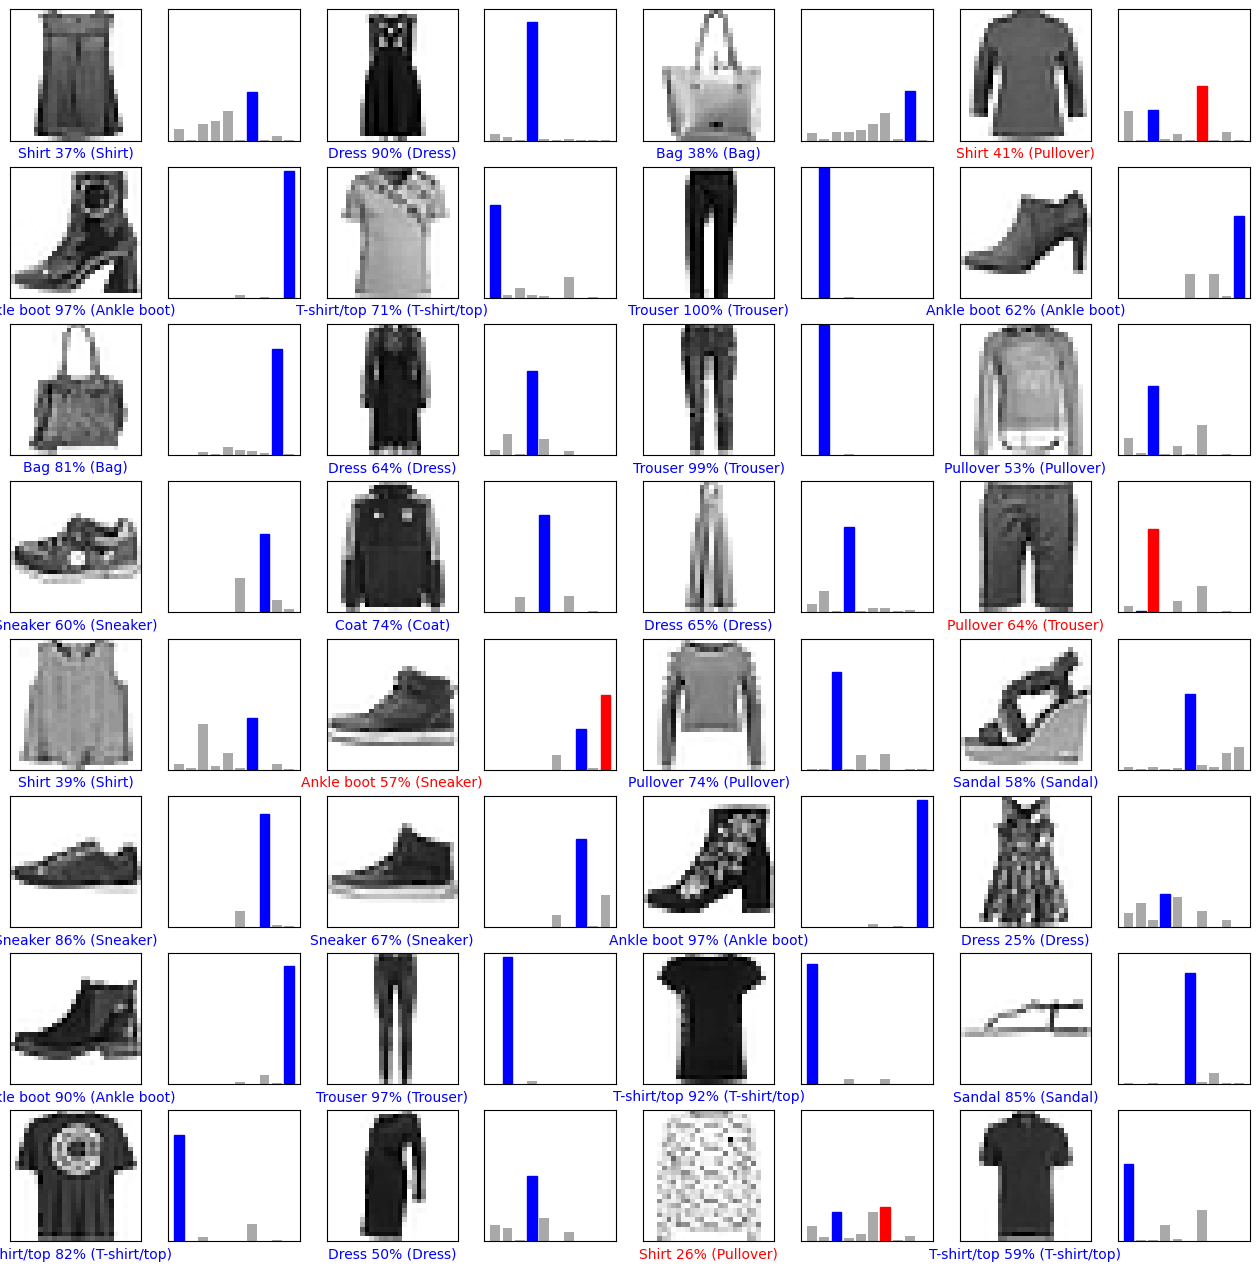

In [29]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [30]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.75      0.79      0.77      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.69      0.62      0.65      1000
       Dress       0.77      0.83      0.80      1000
        Coat       0.63      0.75      0.68      1000
      Sandal       0.83      0.84      0.84      1000
       Shirt       0.51      0.38      0.44      1000
     Sneaker       0.85      0.82      0.84      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.86      0.93      0.89      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



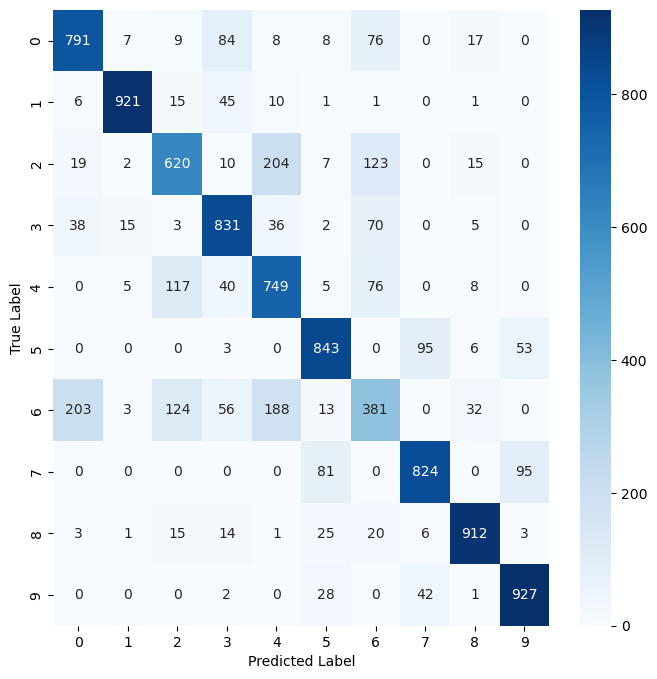

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 모델 최적화

### Early Stopping

In [32]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7928 - loss: 0.6018

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7928 - loss: 0.6018 - val_accuracy: 0.7919 - val_loss: 0.5938
Epoch 2/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8024 - loss: 0.5710

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8024 - loss: 0.5710 - val_accuracy: 0.8022 - val_loss: 0.5651
Epoch 3/60
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8096 - loss: 0.5488

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8097 - loss: 0.5488 - val_accuracy: 0.8128 - val_loss: 0.5444
Epoch 4/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8138 - loss: 0.5362

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8138 - loss: 0.5361 - val_accuracy: 0.8176 - val_loss: 0.5301
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8193 - loss: 0.5184

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8193 - loss: 0.5184 - val_accuracy: 0.8171 - val_loss: 0.5225
Epoch 6/60
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8238 - loss: 0.5080

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8238 - loss: 0.5080 - val_accuracy: 0.8201 - val_loss: 0.5151
Epoch 7/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8288 - loss: 0.4927

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8288 - loss: 0.4927 - val_accuracy: 0.8243 - val_loss: 0.5075
Epoch 8/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8268 - loss: 0.4967

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8268 - loss: 0.4967 - val_accuracy: 0.8214 - val_loss: 0.5040
Epoch 9/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8297 - loss: 0.4824

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8297 - loss: 0.4824 - val_accuracy: 0.8252 - val_loss: 0.4955
Epoch 10/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8296 - loss: 0.4840

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8297 - loss: 0.4840 - val_accuracy: 0.8309 - val_loss: 0.4872
Epoch 11/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8341 - loss: 0.4708

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8341 - loss: 0.4708 - val_accuracy: 0.8320 - val_loss: 0.4835
Epoch 12/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8354 - loss: 0.4632

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8354 - loss: 0.4632 - val_accuracy: 0.8328 - val_loss: 0.4819
Epoch 13/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8371 - loss: 0.4571

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8371 - loss: 0.4571 - val_accuracy: 0.8358 - val_loss: 0.4733
Epoch 14/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8415 - loss: 0.4570

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8415 - loss: 0.4570 - val_accuracy: 0.8353 - val_loss: 0.4700
Epoch 15/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8428 - loss: 0.4477

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8428 - loss: 0.4477 - val_accuracy: 0.8384 - val_loss: 0.4653
Epoch 16/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8416 - loss: 0.4539

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8416 - loss: 0.4539 - val_accuracy: 0.8394 - val_loss: 0.4620
Epoch 17/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8439 - loss: 0.4429

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8439 - loss: 0.4429 - val_accuracy: 0.8408 - val_loss: 0.4600
Epoch 18/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8425 - loss: 0.4442

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8425 - loss: 0.4442 - val_accuracy: 0.8445 - val_loss: 0.4556
Epoch 19/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8491 - loss: 0.4346

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8491 - loss: 0.4346 - val_accuracy: 0.8447 - val_loss: 0.4530
Epoch 20/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8473 - loss: 0.4356

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8473 - loss: 0.4356 - val_accuracy: 0.8441 - val_loss: 0.4527
Epoch 21/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8482 - loss: 0.4293

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8482 - loss: 0.4293 - val_accuracy: 0.8458 - val_loss: 0.4502
Epoch 22/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8487 - loss: 0.4243

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8487 - loss: 0.4243 - val_accuracy: 0.8426 - val_loss: 0.4496
Epoch 23/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8510 - loss: 0.4287

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8510 - loss: 0.4287 - val_accuracy: 0.8474 - val_loss: 0.4458
Epoch 24/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8508 - loss: 0.4226

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8508 - loss: 0.4226 - val_accuracy: 0.8485 - val_loss: 0.4442
Epoch 25/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8505 - loss: 0.4300

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8505 - loss: 0.4300 - val_accuracy: 0.8497 - val_loss: 0.4402
Epoch 26/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8493 - loss: 0.4227 - val_accuracy: 0.8455 - val_loss: 0.4438
Epoch 27/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8488 - loss: 0.4209

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8488 - loss: 0.4209 - val_accuracy: 0.8496 - val_loss: 0.4402
Epoch 28/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8526 - loss: 0.4213

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8526 - loss: 0.4213 - val_accuracy: 0.8507 - val_loss: 0.4369
Epoch 29/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8549 - loss: 0.4163

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8549 - loss: 0.4163 - val_accuracy: 0.8506 - val_loss: 0.4355
Epoch 30/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8545 - loss: 0.4103

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8545 - loss: 0.4103 - val_accuracy: 0.8515 - val_loss: 0.4335
Epoch 31/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8534 - loss: 0.4160 - val_accuracy: 0.8496 - val_loss: 0.4360
Epoch 32/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8542 - loss: 0.4110

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8542 - loss: 0.4110 - val_accuracy: 0.8520 - val_loss: 0.4330
Epoch 33/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8569 - loss: 0.4079

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8569 - loss: 0.4079 - val_accuracy: 0.8522 - val_loss: 0.4310
Epoch 34/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8560 - loss: 0.4093

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8560 - loss: 0.4093 - val_accuracy: 0.8517 - val_loss: 0.4305
Epoch 35/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8573 - loss: 0.4039

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8573 - loss: 0.4039 - val_accuracy: 0.8528 - val_loss: 0.4293
Epoch 36/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8590 - loss: 0.4021 - val_accuracy: 0.8519 - val_loss: 0.4311
Epoch 37/60
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8558 - loss: 0.4065

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8558 - loss: 0.4065 - val_accuracy: 0.8545 - val_loss: 0.4254
Epoch 38/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8587 - loss: 0.4019 - val_accuracy: 0.8546 - val_loss: 0.4259
Epoch 39/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8570 - loss: 0.4023 - val_accuracy: 0.8503 - val_loss: 0.4294
Epoch 40/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8573 - loss: 0.4027 - val_accuracy: 0.8539 - val_loss: 0.4261
Epoch 41/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8597 - loss: 0.3964

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8597 - loss: 0.3964 - val_accuracy: 0.8514 - val_loss: 0.4249
Epoch 42/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8592 - loss: 0.4000 - val_accuracy: 0.8526 - val_loss: 0.4252
Epoch 43/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8579 - loss: 0.3996

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8579 - loss: 0.3996 - val_accuracy: 0.8543 - val_loss: 0.4216
Epoch 44/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8613 - loss: 0.3900 - val_accuracy: 0.8526 - val_loss: 0.4218
Epoch 45/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8629 - loss: 0.3863 - val_accuracy: 0.8523 - val_loss: 0.4237
Epoch 46/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8597 - loss: 0.3895

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8597 - loss: 0.3895 - val_accuracy: 0.8552 - val_loss: 0.4186
Epoch 47/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8604 - loss: 0.3922

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8604 - loss: 0.3922 - val_accuracy: 0.8577 - val_loss: 0.4147
Epoch 48/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8645 - loss: 0.3794 - val_accuracy: 0.8560 - val_loss: 0.4169
Epoch 49/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8655 - loss: 0.3816

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8655 - loss: 0.3816 - val_accuracy: 0.8563 - val_loss: 0.4143
Epoch 50/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8634 - loss: 0.3804 - val_accuracy: 0.8551 - val_loss: 0.4145
Epoch 51/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8636 - loss: 0.3840

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8636 - loss: 0.3840 - val_accuracy: 0.8578 - val_loss: 0.4124
Epoch 52/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8622 - loss: 0.3903 - val_accuracy: 0.8587 - val_loss: 0.4127
Epoch 53/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8621 - loss: 0.3836

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8621 - loss: 0.3835 - val_accuracy: 0.8596 - val_loss: 0.4095
Epoch 54/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8627 - loss: 0.3823 - val_accuracy: 0.8567 - val_loss: 0.4132
Epoch 55/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8651 - loss: 0.3807 - val_accuracy: 0.8593 - val_loss: 0.4099
Epoch 56/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8633 - loss: 0.3873

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8633 - loss: 0.3872 - val_accuracy: 0.8582 - val_loss: 0.4092
Epoch 57/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8658 - loss: 0.3774 - val_accuracy: 0.8586 - val_loss: 0.4094
Epoch 58/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8627 - loss: 0.3823

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8627 - loss: 0.3822 - val_accuracy: 0.8580 - val_loss: 0.4075
Epoch 59/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8665 - loss: 0.3747 - val_accuracy: 0.8577 - val_loss: 0.4092
Epoch 60/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8666 - loss: 0.3757 - val_accuracy: 0.8578 - val_loss: 0.4083


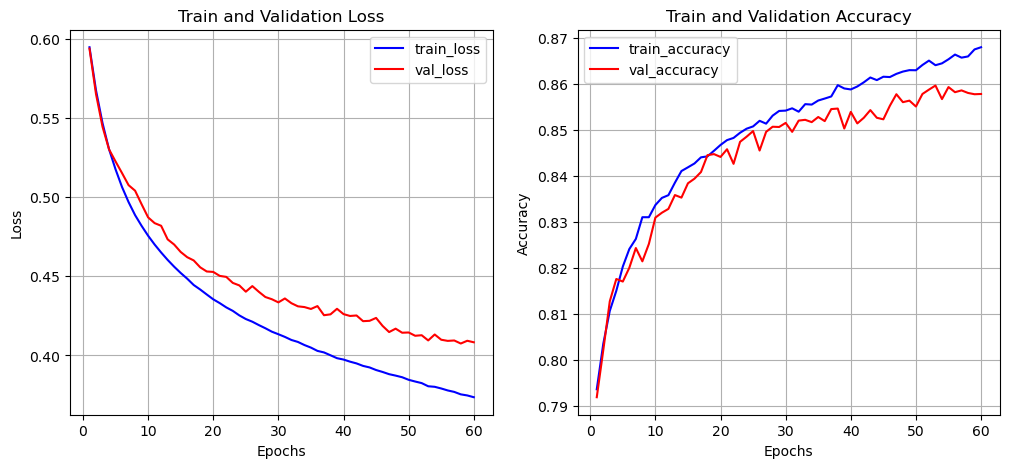

In [33]:
show_history(history)

In [34]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8497 - loss: 0.4226


[0.42700108885765076, 0.8446999788284302]

### 활성화 함수

In [94]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu')) # 비선형으로 바꿈 
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [58]:
history2 = model.fit(x_train, y_train,epochs=60,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3791 - loss: 1.9097 - val_accuracy: 0.6456 - val_loss: 1.2457
Epoch 2/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6687 - loss: 1.1588 - val_accuracy: 0.6994 - val_loss: 0.9869
Epoch 3/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7136 - loss: 0.9457 - val_accuracy: 0.7421 - val_loss: 0.8606
Epoch 4/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7442 - loss: 0.8379 - val_accuracy: 0.7524 - val_loss: 0.7974
Epoch 5/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7576 - loss: 0.7815 - val_accuracy: 0.7646 - val_loss: 0.7518
Epoch 6/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7719 - loss: 0.7336 - val_accuracy: 0.7688 - val_loss: 0.7179
Epoch 7/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7812 - loss: 0.6986 - val_accuracy: 0.7728 - val_loss: 0.6898
Epoch 8/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7869 - loss: 0.6751 - val_accuracy: 0.7909 - v

In [59]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

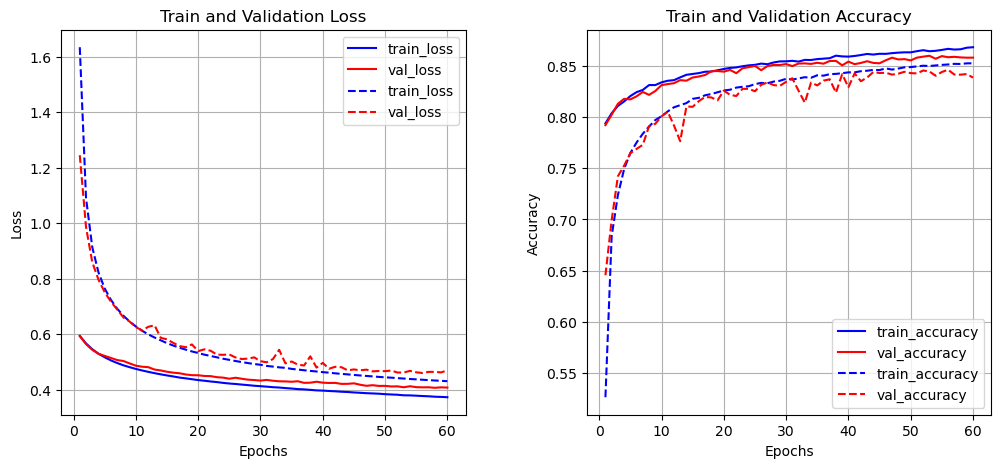

In [60]:
diff_history(history, history2)

In [62]:
model.evaluate(x_test, y_test) # relu로 변경하니 성능이 더 안 좋아졌다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8351 - loss: 0.4794


[0.4905673861503601, 0.8303999900817871]

### 옵티마이저

In [107]:
# categorical_crossentropy는 원-핫 인코딩 레이블에 적합
# sparse_categorical_crossentropy는 정수 레이블에 적합
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='Adam',
              metrics=['accuracy'])

In [104]:
history3 = model.fit(x_train, y_train,epochs=60,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8015 - loss: 0.7745 - val_accuracy: 0.8092 - val_loss: 0.6672
Epoch 2/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8284 - loss: 0.5970 - val_accuracy: 0.8212 - val_loss: 0.5948
Epoch 3/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8397 - loss: 0.5585 - val_accuracy: 0.7947 - val_loss: 0.6389
Epoch 4/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8310 - loss: 0.5793 - val_accuracy: 0.8322 - val_loss: 0.5654
Epoch 5/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8388 - loss: 0.5498 - val_accuracy: 0.7574 - val_loss: 0.7735
Epoch 6/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8212 - loss: 0.6042 - val_accuracy: 0.8015 - val_loss: 0.6121
Epoch 7/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8379 - loss: 0.5517 - val_accuracy: 0.8339 - val_loss: 0.5500
Epoch 8/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8442 - loss: 0.5344 - val_accuracy: 0.7798 - v

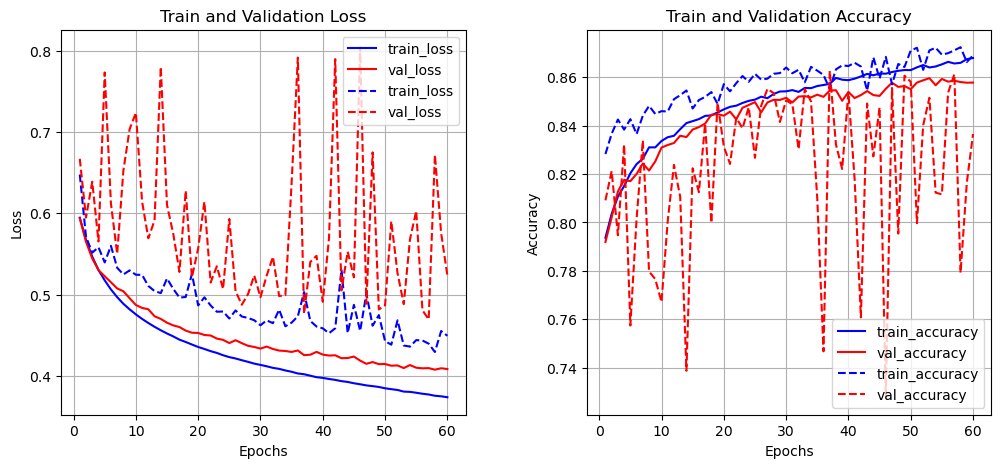

In [105]:
diff_history(history, history3)

In [106]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8329 - loss: 0.5430


[0.5469797849655151, 0.8299999833106995]

### 규제

In [112]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512,
                       activation='sigmoid',
                       kernel_regularizer='l2')) 
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [114]:
history4 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5410 - loss: 7.1319 - val_accuracy: 0.7282 - val_loss: 4.6862
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7372 - loss: 4.2132 - val_accuracy: 0.7519 - val_loss: 3.0788
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7561 - loss: 2.8091 - val_accuracy: 0.7634 - val_loss: 2.1521
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7732 - loss: 1.9847 - val_accuracy: 0.7749 - val_loss: 1.5967
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7774 - loss: 1.4994 - val_accuracy: 0.7828 - val_loss: 1.2693
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7834 - loss: 1.2127 - val_accuracy: 0.7896 - val_loss: 1.0675
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7915 - loss: 1.0228 - val_accuracy: 0.7921 - val_loss: 0.9428
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7936 - los

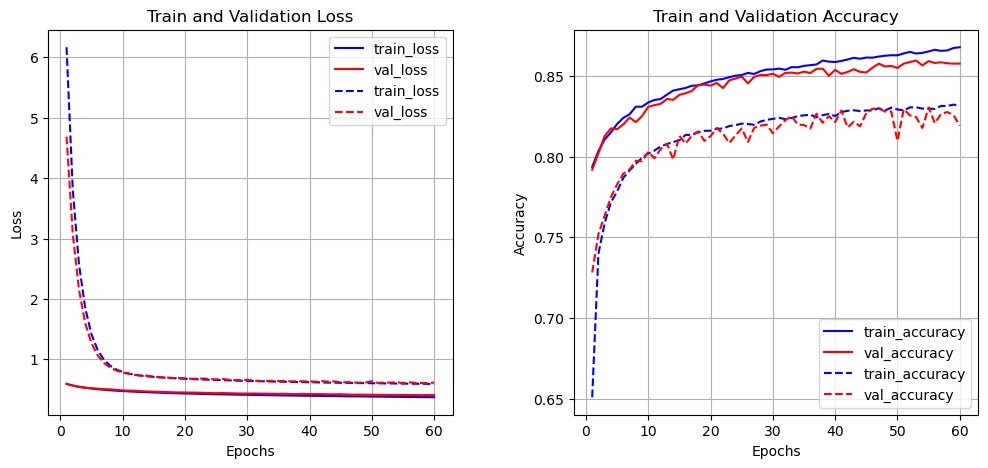

In [115]:
diff_history(history, history4)

In [124]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8868 - loss: 0.3342


[0.3366667330265045, 0.8881000280380249]

기존 모델 학습 결과와 L2 규제 방법을 적용한 모델의 학습 결과를 살펴보면,  
성능은 일부 저하되지만 어느정도 과대적합을 억제됨  
가장 성능이 좋게 나옴

### 드롭아웃

In [118]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512,
                       activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [119]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='Adam',# 혹은 SGD
              metrics=['accuracy'])

In [120]:
history5 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7068 - loss: 0.8132 - val_accuracy: 0.8323 - val_loss: 0.4612
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8310 - loss: 0.4673 - val_accuracy: 0.8491 - val_loss: 0.4142
Epoch 3/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8478 - loss: 0.4186

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8478 - loss: 0.4186 - val_accuracy: 0.8611 - val_loss: 0.3889
Epoch 4/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8542 - loss: 0.3950

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.8542 - loss: 0.3950 - val_accuracy: 0.8664 - val_loss: 0.3726
Epoch 5/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8630 - loss: 0.3754

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8630 - loss: 0.3754 - val_accuracy: 0.8652 - val_loss: 0.3623
Epoch 6/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8696 - loss: 0.3598

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8696 - loss: 0.3598 - val_accuracy: 0.8731 - val_loss: 0.3565
Epoch 7/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8678 - loss: 0.3592

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8678 - loss: 0.3591 - val_accuracy: 0.8742 - val_loss: 0.3537
Epoch 8/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8837 - loss: 0.3220

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8837 - loss: 0.3220 - val_accuracy: 0.8773 - val_loss: 0.3394
Epoch 9/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8783 - loss: 0.3192

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8783 - loss: 0.3192 - val_accuracy: 0.8802 - val_loss: 0.3351
Epoch 10/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8814 - loss: 0.3143

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8814 - loss: 0.3143 - val_accuracy: 0.8797 - val_loss: 0.3341
Epoch 11/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8857 - loss: 0.3059 - val_accuracy: 0.8757 - val_loss: 0.3424
Epoch 12/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8902 - loss: 0.2926

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8901 - loss: 0.2927 - val_accuracy: 0.8842 - val_loss: 0.3249
Epoch 13/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8899 - loss: 0.2983 - val_accuracy: 0.8817 - val_loss: 0.3286
Epoch 14/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8904 - loss: 0.2885 - val_accuracy: 0.8864 - val_loss: 0.3289
Epoch 15/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8946 - loss: 0.2805

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8946 - loss: 0.2805 - val_accuracy: 0.8898 - val_loss: 0.3144
Epoch 16/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8982 - loss: 0.2707

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8982 - loss: 0.2708 - val_accuracy: 0.8913 - val_loss: 0.3140
Epoch 17/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8978 - loss: 0.2679 - val_accuracy: 0.8900 - val_loss: 0.3146
Epoch 18/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8969 - loss: 0.2725

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8969 - loss: 0.2725 - val_accuracy: 0.8905 - val_loss: 0.3121
Epoch 19/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9023 - loss: 0.2618 - val_accuracy: 0.8891 - val_loss: 0.3194
Epoch 20/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9025 - loss: 0.2571 - val_accuracy: 0.8892 - val_loss: 0.3212
Epoch 21/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9057 - loss: 0.2538 - val_accuracy: 0.8932 - val_loss: 0.3144
Epoch 22/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9049 - loss: 0.2536

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9049 - loss: 0.2536 - val_accuracy: 0.8912 - val_loss: 0.3077
Epoch 23/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9096 - loss: 0.2409 - val_accuracy: 0.8940 - val_loss: 0.3135
Epoch 24/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9075 - loss: 0.2436 - val_accuracy: 0.8918 - val_loss: 0.3126
Epoch 25/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9122 - loss: 0.2341 - val_accuracy: 0.8943 - val_loss: 0.3150
Epoch 26/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9127 - loss: 0.2303 - val_accuracy: 0.8917 - val_loss: 0.3198
Epoch 27/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9103 - loss: 0.2343 - val_accuracy: 0.8949 - val_loss: 0.3144
Epoch 28/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9137 - loss: 0.2296 - val_accuracy: 0.8951 - val_loss: 0.3225
Epoch 29/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9144 - loss: 0.227

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9135 - loss: 0.2248 - val_accuracy: 0.8981 - val_loss: 0.3073
Epoch 31/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9165 - loss: 0.2180 - val_accuracy: 0.8963 - val_loss: 0.3188
Epoch 32/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9182 - loss: 0.2155 - val_accuracy: 0.8913 - val_loss: 0.3221
Epoch 33/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9185 - loss: 0.2125 - val_accuracy: 0.8934 - val_loss: 0.3226
Epoch 34/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9178 - loss: 0.2100 - val_accuracy: 0.8952 - val_loss: 0.3194
Epoch 35/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9216 - loss: 0.2031 - val_accuracy: 0.8973 - val_loss: 0.3143
Epoch 36/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9208 - loss: 0.2059 - val_accuracy: 0.8961 - val_loss: 0.3142
Epoch 37/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9207 - loss: 0

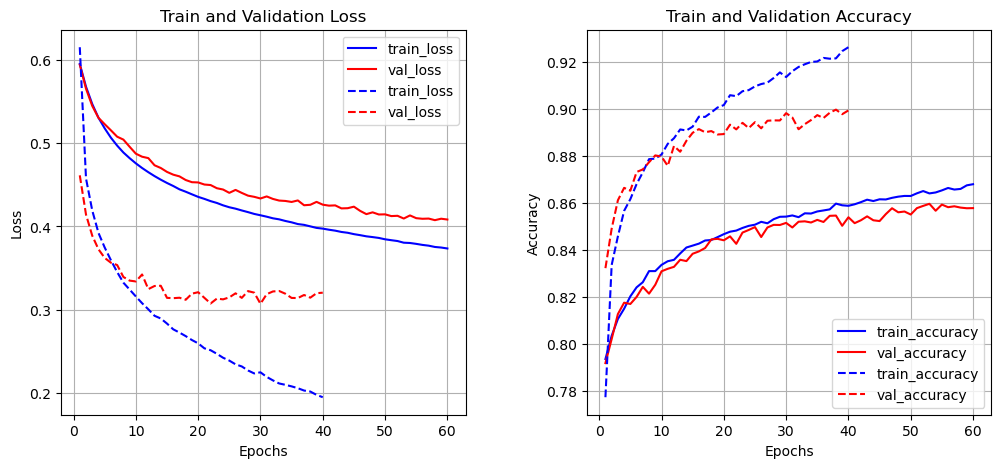

In [121]:
diff_history(history, history5)

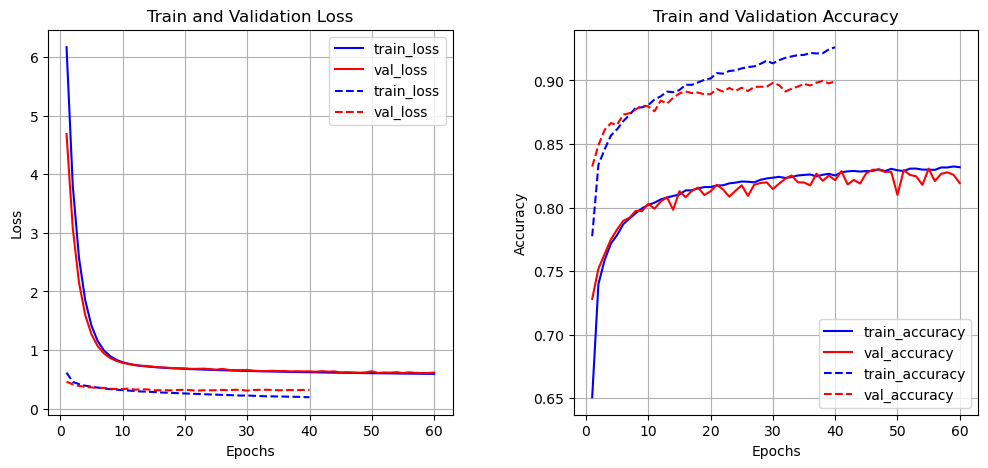

In [122]:
diff_history(history4, history5)

### 배치 정규화

In [127]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,234 (1.57 MB)

 Trainable params: 409,642 (1.56 MB)

 Non-trainable params: 2,592 (10.12 KB)

In [128]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD',
              metrics=['accuracy'])

In [129]:
batch_norm_history = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7667 - loss: 0.6822 - val_accuracy: 0.8395 - val_loss: 0.4661
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8383 - loss: 0.4619 - val_accuracy: 0.8488 - val_loss: 0.4408
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8465 - loss: 0.4357 - val_accuracy: 0.8532 - val_loss: 0.4264
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8563 - loss: 0.4125 - val_accuracy: 0.8529 - val_loss: 0.4235
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8579 - loss: 0.3976 - val_accuracy: 0.8577 - val_loss: 0.4066
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8640 - loss: 0.3848 - val_accuracy: 0.8492 - val_loss: 0.4241
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8666 - loss: 0.3827 - val_accuracy: 0.8633 - val_loss: 0.3969
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8717 - loss: 0.3614 - 

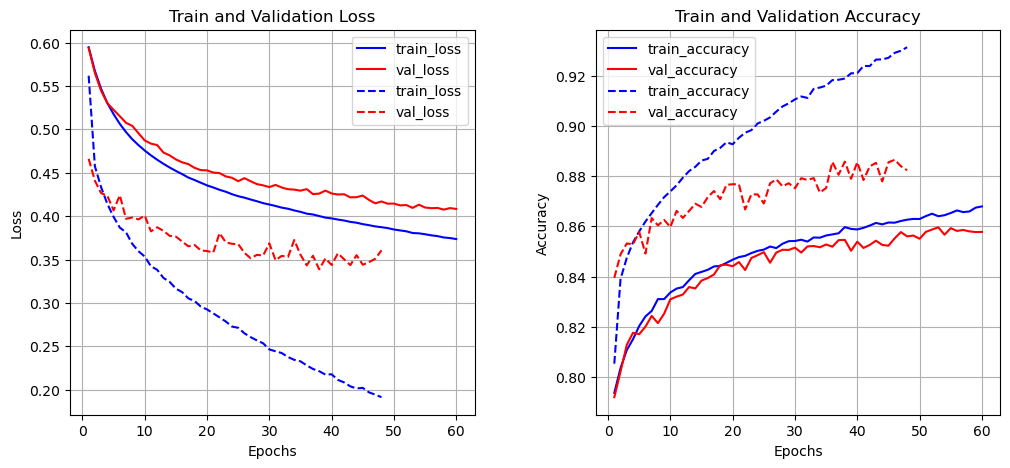

In [130]:
diff_history(history, batch_norm_history)

In [131]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8766 - loss: 0.3630


[0.3619356155395508, 0.8755000233650208]

### 배치 정규화 + 드롭아웃

In [132]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))
model.add(layers.Dropout(0.5))
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_2                │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,234 (1.57 MB)

 Trainable params: 409,642 (1.56 MB)

 Non-trainable params: 2,592 (10.12 KB)

In [134]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD',
              metrics=['accuracy'])

In [135]:
history6 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3159 - loss: 6.6563 - val_accuracy: 0.7127 - val_loss: 2.4653
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4144 - loss: 3.8826 - val_accuracy: 0.7663 - val_loss: 2.2777
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4196 - loss: 3.4088 - val_accuracy: 0.7828 - val_loss: 2.4415
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4265 - loss: 3.2159 - val_accuracy: 0.7954 - val_loss: 2.4775
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4316 - loss: 3.0578 - val_accuracy: 0.8073 - val_loss: 2.5107
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4386 - loss: 2.9501 - val_accuracy: 0.8163 - val_loss: 2.4606
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4374 - loss: 2.8743 - val_accuracy: 0.8228 - val_loss: 2.5038
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4433 - loss: 2.7848 - 

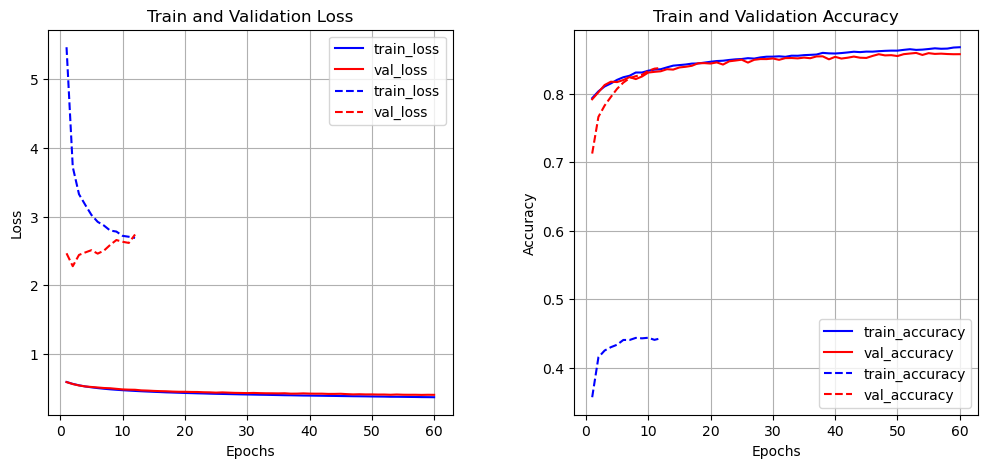

In [136]:
diff_history(history, history6)

In [137]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7654 - loss: 2.2859


[2.3369264602661133, 0.760200023651123]

### 모델 결과 분석

In [138]:
# L2 규제 적용한 모델이 가장 성능이 좋았으므로 자세히 분석해본다.

In [146]:
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512,activation='sigmoid',kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [151]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [152]:
history10 = model.fit(x_train, y_train,epochs=60,validation_data=(x_val, y_val),callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5197 - loss: 2.2625 - val_accuracy: 0.7339 - val_loss: 1.4892
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7394 - loss: 1.4337 - val_accuracy: 0.7501 - val_loss: 1.3093
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7608 - loss: 1.2808 - val_accuracy: 0.7700 - val_loss: 1.2218
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7797 - loss: 1.1872 - val_accuracy: 0.7871 - val_loss: 1.1487
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7913 - loss: 1.1305 - val_accuracy: 0.7985 - val_loss: 1.0977
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7986 - loss: 1.0872 - val_accuracy: 0.8045 - val_loss: 1.0553
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8099 - loss: 1.0320 - val_accuracy: 0.8084 - val_loss: 1.0192
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8149 - loss: 0.9940 -

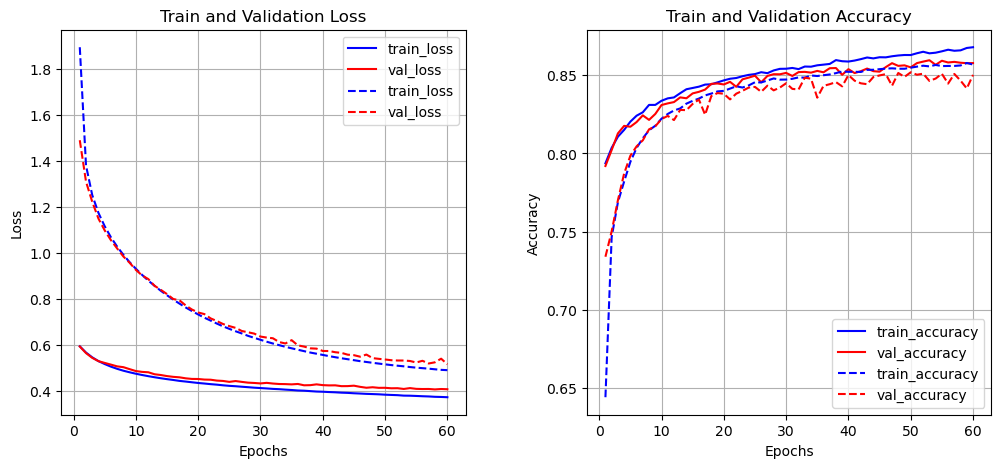

In [153]:
diff_history(history, history10)

In [154]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8394 - loss: 0.5309


[0.535719096660614, 0.8363000154495239]

In [160]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512,
                       activation='sigmoid',
                       kernel_regularizer='l2')) 
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [161]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [162]:
history11 = model.fit(x_train, y_train,epochs=60,validation_data=(x_val, y_val),callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6945 - loss: 1.8369 - val_accuracy: 0.7415 - val_loss: 0.9419
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7460 - loss: 0.9235 - val_accuracy: 0.7407 - val_loss: 0.9487
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7543 - loss: 0.8712 - val_accuracy: 0.7519 - val_loss: 0.8303
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7615 - loss: 0.8413 - val_accuracy: 0.7316 - val_loss: 0.8608
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7627 - loss: 0.8308 - val_accuracy: 0.7294 - val_loss: 0.8898
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7646 - loss: 0.8169 - val_accuracy: 0.7692 - val_loss: 0.8259
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7642 - loss: 0.8058 - val_accuracy: 0.7533 - val_loss: 0.8466
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7726 - loss: 0

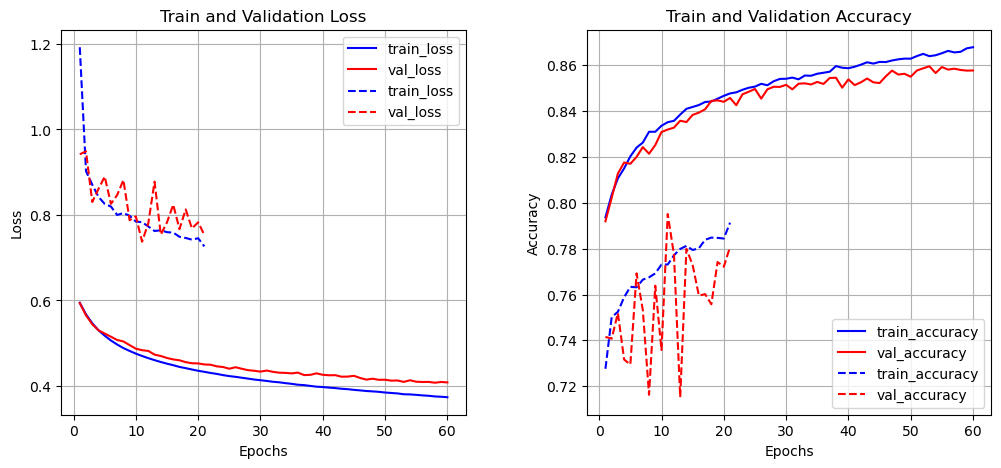

In [163]:
diff_history(history, history11)

In [164]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7873 - loss: 0.7480


[0.7507381439208984, 0.7854999899864197]